### Import Libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import snscrape.modules.twitter as sntwitter
from textblob import TextBlob
from wordcloud import WordCloud
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

### Scrap Tweet

In [2]:
query = "(#ObiDatti023) until:2022-11-05 since:2022-01-01"
tweets = []
tweet_limit = 1000

# use TwitterSearchScrape to search tweet and append to list
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) == tweet_limit:
        break
    else:
        tweets.append([tweet.date, tweet.user.username, tweet.content])

# create a dataframe    
tweet_df = pd.DataFrame(tweets, columns=['date', 'user', 'tweet'])
tweet_df.head()

,date,user,tweet
0,2022-11-04 23:59:06+00:00,GWiseTime,@KelvinIkenga @Marvy_olu Who wey him dey message?\n\nNa the 23years of APCPDP wey we dey pay foreign exchange to Ghana schools?\n\nMake him message him self say @NgLabour\nIs for the boy we dey beg am money now.\n#PeterObi4President2023\n#ObiDatti023
1,2022-11-04 23:53:53+00:00,GWiseTime,"Gov. Men like @fkeyamo , @realFFK , @BwalaDaniel , @AjuriNgelale , @BashirAhmaad and @adamugarba problems are;\n\nWhy will @PeterObi try to come remove gov.Chops now?\nNow wey be say we don serve 'gov. chops men', come reach baba 'wey no well' wey we go chop well well?\n#ObiDatti023"
2,2022-11-04 23:39:12+00:00,Bigantey,"This is what happens when old men refuse to retire ,vote them out,vote in #ObiDatti023 https://t.co/eHlG1uj2ZD"
3,2022-11-04 23:35:15+00:00,nas_guy7,@Topboychriss #ObiDatti023
4,2022-11-04 23:30:50+00:00,ejikemekalu,"@PO_GrassRootM We are talking about important things,all someone could notice is the background and curtain design God abeg ooo #ObiDatti023"


### Clean Tweet
Remove unneccessary characters from tweet.

In [3]:
# clean tweet with a function
def clean_tweet(text):
    text = re.sub('@[A-Za-z0-9_]+', ' ', text) #remove @mention
    text = re.sub('#', ' ', text) #remove #tags
    text = re.sub('RT[\s]+', ' ', text) #remove retweet
    text = re.sub('https?:\/\/\S+', ' ', text)
    text = re.sub('\n', ' ', text)
    return text
tweet_df['cleaned_tweet'] = tweet_df['tweet'].apply(clean_tweet)
tweet_df .head()

,date,user,tweet,cleaned_tweet
0,2022-11-04 23:59:06+00:00,GWiseTime,@KelvinIkenga @Marvy_olu Who wey him dey message?\n\nNa the 23years of APCPDP wey we dey pay foreign exchange to Ghana schools?\n\nMake him message him self say @NgLabour\nIs for the boy we dey beg am money now.\n#PeterObi4President2023\n#ObiDatti023,Who wey him dey message? Na the 23years of APCPDP wey we dey pay foreign exchange to Ghana schools? Make him message him self say Is for the boy we dey beg am money now. PeterObi4President2023 ObiDatti023
1,2022-11-04 23:53:53+00:00,GWiseTime,"Gov. Men like @fkeyamo , @realFFK , @BwalaDaniel , @AjuriNgelale , @BashirAhmaad and @adamugarba problems are;\n\nWhy will @PeterObi try to come remove gov.Chops now?\nNow wey be say we don serve 'gov. chops men', come reach baba 'wey no well' wey we go chop well well?\n#ObiDatti023","Gov. Men like , , , , and problems are; Why will try to come remove gov.Chops now? Now wey be say we don serve 'gov. chops men', come reach baba 'wey no well' wey we go chop well well? ObiDatti023"
2,2022-11-04 23:39:12+00:00,Bigantey,"This is what happens when old men refuse to retire ,vote them out,vote in #ObiDatti023 https://t.co/eHlG1uj2ZD","This is what happens when old men refuse to retire ,vote them out,vote in ObiDatti023"
3,2022-11-04 23:35:15+00:00,nas_guy7,@Topboychriss #ObiDatti023,ObiDatti023
4,2022-11-04 23:30:50+00:00,ejikemekalu,"@PO_GrassRootM We are talking about important things,all someone could notice is the background and curtain design God abeg ooo #ObiDatti023","We are talking about important things,all someone could notice is the background and curtain design God abeg ooo ObiDatti023"


In [4]:
# filter tweet column
tweet_df = tweet_df[['cleaned_tweet']]

# save cleaned tweet to csv
tweet_df.to_csv('ds_tweet.csv')
saved_tweet = pd.read_csv('ds_tweet.csv', index_col=0)
saved_tweet.head()

,cleaned_tweet
0,Who wey him dey message? Na the 23years of APCPDP wey we dey pay foreign exchange to Ghana schools? Make him message him self say Is for the boy we dey beg am money now. PeterObi4President2023 ObiDatti023
1,"Gov. Men like , , , , and problems are; Why will try to come remove gov.Chops now? Now wey be say we don serve 'gov. chops men', come reach baba 'wey no well' wey we go chop well well? ObiDatti023"
2,"This is what happens when old men refuse to retire ,vote them out,vote in ObiDatti023"
3,ObiDatti023
4,"We are talking about important things,all someone could notice is the background and curtain design God abeg ooo ObiDatti023"


In [5]:
saved_tweet.shape

(1000, 1)

### Sentiment Analysis
Used a textblod library to detect subjectivity or polarity of a tweet.

In [7]:
# use a function to get the polarity and subjectivity
def get_subjetivity(text):
    return  TextBlob(text).sentiment.subjectivity

# polarity
def get_polarity(text):
    return  TextBlob(text).sentiment.polarity

saved_tweet['subjectivity'] = saved_tweet['cleaned_tweet'].apply(get_subjetivity)
saved_tweet['polarity'] = saved_tweet['cleaned_tweet'].apply(get_polarity)

saved_tweet.head()

,cleaned_tweet,subjectivity,polarity
0,Who wey him dey message? Na the 23years of APCPDP wey we dey pay foreign exchange to Ghana schools? Make him message him self say Is for the boy we dey beg am money now. PeterObi4President2023 ObiDatti023,0.125,-0.125
1,"Gov. Men like , , , , and problems are; Why will try to come remove gov.Chops now? Now wey be say we don serve 'gov. chops men', come reach baba 'wey no well' wey we go chop well well? ObiDatti023",0.000,0.000
2,"This is what happens when old men refuse to retire ,vote them out,vote in ObiDatti023",0.200,0.100
3,ObiDatti023,0.000,0.000
4,"We are talking about important things,all someone could notice is the background and curtain design God abeg ooo ObiDatti023",1.000,0.400


In [9]:
# segment polarity into pos itive, neutral and negative
def get_polarity_score(score):
    if score < 0:
        return 'negative'
    elif score == 0:
         return 'neutral'
    else:
        return 'positive'

saved_tweet['polarity_score'] =  saved_tweet['polarity'].apply(get_polarity_score)

In [11]:
saved_tweet['polarity_score'].value_counts()

positive    467
neutral     385
negative    148
Name: polarity_score, dtype: int64

### Polarity bar graph

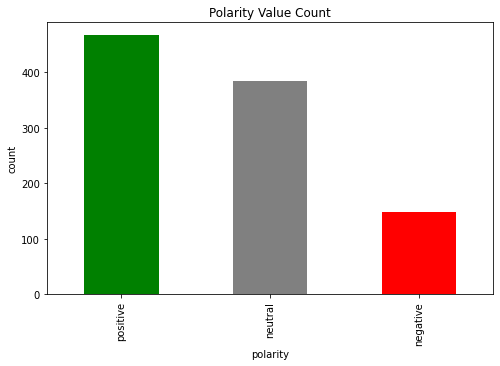

In [29]:
fig = plt.figure(figsize=(8,5))
color = ['green', 'grey', 'red']
saved_tweet['polarity_score'].value_counts().plot(kind='bar', color=color, align='center')
plt.title('Polarity Value Count')
plt.xlabel('polarity')
plt.ylabel('count')
plt.grid(False)
plt.show()

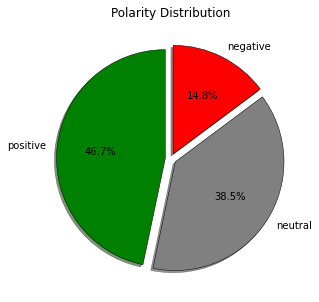

In [56]:
fig = plt.figure(figsize=(10,5))
color = ['green', 'grey', 'red']

label=saved_tweet['polarity_score'].value_counts()
explode= (0.05,0.05,0.05)
label.plot(kind='pie', explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, label='', colors=color, wedgeprops={'linewidth':0.5, 'edgecolor': 'black'})
plt.title('Polarity Distribution')
plt.show()

Word cloud for positive tweets


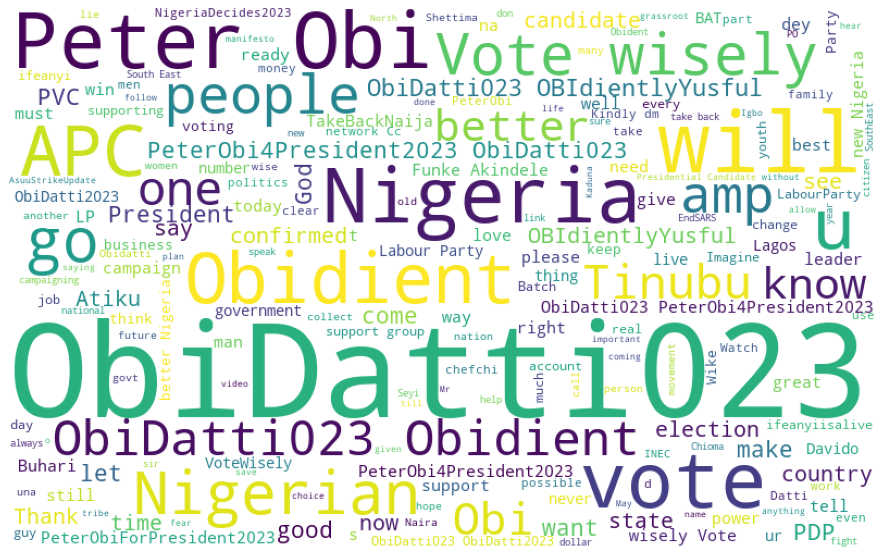

Word cloud for negative tweets


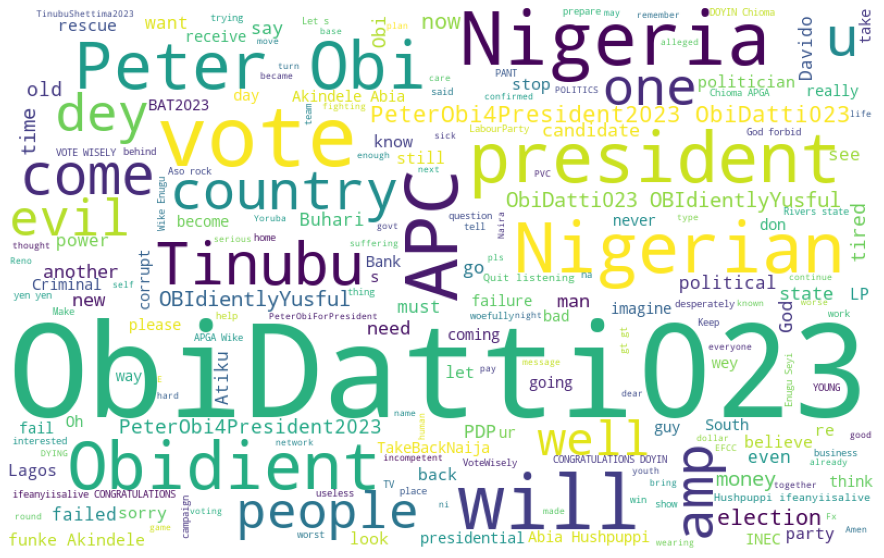

In [60]:
#create a function for wordcloud
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()
    
#wordcloud for positive tweets
print('Word cloud for positive tweets')
posTweets = saved_tweet.loc[saved_tweet['polarity_score']=='positive', 'cleaned_tweet']
create_wordcloud(posTweets)

#wordcloud for negative tweets
print('Word cloud for negative tweets')
negTweets = saved_tweet.loc[saved_tweet['polarity_score']=='negative', 'cleaned_tweet']
create_wordcloud(negTweets)

### Most popular word in tweet and their frequency